# Linear Regression Assignment 
----

## Problem 1:  Linear Regression
---

Assume that during a three hour period spent outside a person recorded the temperature and their water consumption. The experiment was conducted on 7 randomly selected days during the summer.

**Here is the data:**

Day Temp: 98,83,95,74,90,84,82.

Water consumed oz: 48,27,48,16,32,25,20.

- Calculate the linear regression equation .

- Does it have positive or negative correlation?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Training\Machine Learning\Assignments\water consumption.csv')
temp = data['Day Temp'].values.reshape(-1, 1)
water_consumed = data['Water consumed'].values

model = LinearRegression()

model.fit(temp, water_consumed)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

correlation = "positive" if slope > 0 else "negative"
print(f"The correlation between temperature and water consumption is {correlation}.")

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(temp, water_consumed, color = 'red')
plt.plot(temp, model.predict(temp), color = 'blue')
plt.title('water consumption')
plt.xlabel('Day Temp')
plt.ylabel('Water consumed')
plt.show()

## Problem 2:  Linear Regression
---
We want to predict the CO2 emission of a car , A csv file contains the data is provided **`cars.csv`** : 
- Clean the data and explain what you have done.
- Build a linear regression model on this data.
- Predict the CO2 emission of a car where the weight is 2555, and the volume is 1300cm3.
- Do we care about the car brand while using this model ? and why ?.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Training\Machine Learning\Assignments\cars.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Toyota,camry,1200,"9,22",99
4,Fiat,500,900,865,90


In [79]:
df.dtypes

Car       object
Model     object
Volume    object
Weight    object
CO2        int64
dtype: object

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume'>

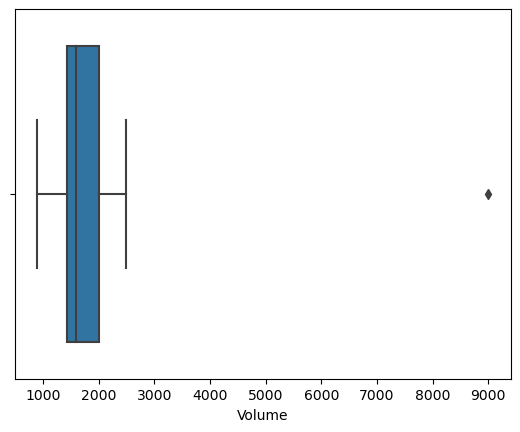

In [80]:
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
sns.boxplot(df['Volume'])

In [82]:
value_to_delete = ['gx'] #delete this value to be be null value then fill it with mean ignoring null value 
df = df[~df['Volume'].isin(value_to_delete)]

df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

mean_value = np.nanmean(df['Volume'])

df['Volume'].fillna(mean_value, inplace=True)

df['Volume'] = df['Volume'].astype(int)

In [83]:
value_to_delete = '9,22'#delete this value to be be null value then fill it with mean ignoring null value

df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

mean_value = np.nanmean(df['Weight'])

df['Weight'].fillna(mean_value, inplace=True)

df['Weight'] = df['Weight'].astype(int)

In [84]:
Q1 = np.percentile(df['Volume'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['Volume'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

550.0


In [85]:
x=(Q3+1.5*IQR)
print("Highest allowed", x)
x= (Q1-1.5*IQR)
print("Lowest allowed",x)
lower = df[(df['Volume'] <= x)]
upper = df[(df['Volume'] >= x)]
lower = np.where(df['Volume'] <= (Q1-1.5*IQR))
df.drop(lower[0], inplace = True)


Highest allowed 2825.0
Lowest allowed 625.0


In [87]:
upper = np.where(df['Volume'] >= (Q3+1.5*IQR))
df.drop(upper[0], inplace = True) #deleting the outlier


In [88]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]



In [89]:
df['Volume'].describe()

count      38.000000
mean     1605.105263
std       385.432210
min       900.000000
25%      1425.000000
50%      1600.000000
75%      2000.000000
max      2500.000000
Name: Volume, dtype: float64

In [90]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [92]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = regressor.predict(X_test)

In [94]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

33.3322230859804
-0.1333635867385381


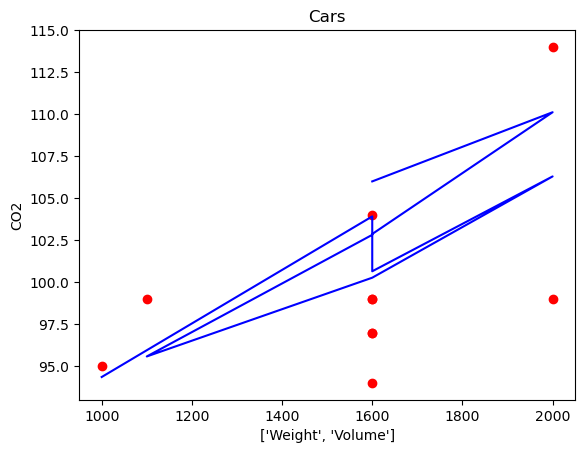

In [95]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], regressor.predict(X_test), color = 'blue')
plt.title('Cars')
plt.xlabel(['Weight', 'Volume'])
plt.ylabel('CO2')
plt.show()

In [96]:
predictedCO2 = regressor.predict([[3300, 1300]])
print("predictedCO2 [weight=2555kg, volume=1300ccm]")
print(predictedCO2)

predictedCO2 [weight=2555kg, volume=1300ccm]
[112.60753894]


In [ ]:
#Q4 It depends on weight & volume